<div style="border-left: 6px solid #4A90E2; color:white; padding:20px; border-radius:10px; font-family:Arial, sans-serif; text-align:center; font-size:28px; font-weight:bold;">
  📊 01 – Data Exploration and Preprocessing
</div>


<div style="border-left: 6px solid #27ae60; color:white; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">📦 Importar Bibliotecas e Definir Caminhos</h2>
</div>

<div style="margin-left:60px; padding:10px;"> 
<p style="font-size:18px;">Este é o bloco inicial do projeto de classificação de imagens de espécies raras.</p>

<p>Aqui realizamos as seguintes ações:</p>

<ul style="line-height: 1.6;">
    <li>📁 <strong>Importação de bibliotecas</strong> para manipulação de dados (<code>pandas</code>), caminhos (<code>pathlib</code>) e imagens (<code>PIL</code>).</li>
    <li>🖼️ <strong>Estilização dos gráficos</strong> com <code>matplotlib</code> e <code>seaborn</code> para visualizações limpas e consistentes.</li>
    <li>📂 <strong>Definição dos caminhos principais</strong> do projeto (imagens e ficheiro de metadata).</li>
    <li>✅ <strong>Verificação automática</strong> para garantir que os ficheiros e diretórios existem.</li>
</ul>


<p>Este setup garante uma base sólida para carregar e explorar os dados com segurança e clareza.</p>
</div>


In [ ]:
# ========================================== 📦 Importar bibliotecas essenciais ==========================================

import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


ModuleNotFoundError: No module named 'cv2'

In [85]:
# ========================================== 🎨 Estilo de visualização ==========================================
sns.set(style="whitegrid")

In [122]:
# ========================================== 📂 Definir caminhos principais do projeto ==========================================
PROJECT_ROOT = Path().resolve().parent

IMAGE_DIR = PROJECT_ROOT / 'data' / 'external'
ITERIM_DIR = PROJECT_ROOT / 'data' / 'iterim'
METADATA_PATH = IMAGE_DIR / 'metadata.csv'

print("📁 Caminho base do projeto:", PROJECT_ROOT)
print("🖼️ Diretório das imagens:", IMAGE_DIR, "->", "Existe ✅" if IMAGE_DIR.exists() else "Não encontrado ❌")
print("📄 Caminho do metadata.csv:", METADATA_PATH, "->", "Existe ✅" if METADATA_PATH.exists() else "Não encontrado ❌")
print("📄 Caminho do metadata.csv:", ITERIM_DIR, "->", "Existe ✅" if METADATA_PATH.exists() else "Não encontrado ❌")

📁 Caminho base do projeto: D:\Repositories\DL_EOLP
🖼️ Diretório das imagens: D:\Repositories\DL_EOLP\data\external -> Existe ✅
📄 Caminho do metadata.csv: D:\Repositories\DL_EOLP\data\external\metadata.csv -> Existe ✅
📄 Caminho do metadata.csv: D:\Repositories\DL_EOLP\data\iterim -> Existe ✅


<div style="border-left: 6px solid #27ae60; color:white; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">📄 Load CSV – Carregar o metadata</h2>
</div>

<div style="margin-left:60px; padding:10px;"> 
<p>Este bloco lê o ficheiro <code>metadata.csv</code>, que contém os nomes das imagens e as respetivas classificações (como família, filo, reino, etc.).</p>

<p>Os dados são carregados num <code>DataFrame</code> do <strong>pandas</strong>, permitindo análise exploratória, criação de gráficos e preparação para o treino do modelo.</p>

<p>✔️ O ficheiro deve estar localizado em <code>data/raw/metadata.csv</code>, conforme definido no caminho <code>METADATA_PATH</code>.</p>
</div>


In [87]:
df = pd.read_csv(METADATA_PATH)
df.head()

,rare_species_id,eol_content_id,eol_page_id,kingdom,phylum,family,file_path
0,75fd91cb-2881-41cd-88e6-de451e8b60e2,12853737,449393,animalia,mollusca,unionidae,mollusca_unionidae/12853737_449393_eol-full-si...
1,28c508bc-63ff-4e60-9c8f-1934367e1528,20969394,793083,animalia,chordata,geoemydidae,chordata_geoemydidae/20969394_793083_eol-full-...
2,00372441-588c-4af8-9665-29bee20822c0,28895411,319982,animalia,chordata,cryptobranchidae,chordata_cryptobranchidae/28895411_319982_eol-...
3,29cc6040-6af2-49ee-86ec-ab7d89793828,29658536,45510188,animalia,chordata,turdidae,chordata_turdidae/29658536_45510188_eol-full-s...
4,94004bff-3a33-4758-8125-bf72e6e57eab,21252576,7250886,animalia,chordata,indriidae,chordata_indriidae/21252576_7250886_eol-full-s...


<div style="border-left: 6px solid #27ae60; color:white; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">📊 Vista Geral do Dataset</h2>
</div>

<div style="margin-left:60px; padding:10px;"> 
  <p>Esta seção apresenta uma visão estatística e visual dos dados disponíveis, focando na sua distribuição por categoria biológica.</p>
</div>


<div style="border-left: 6px solid #ffffff; color:white; margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">🧮 Verificar quantas imagens existem no total</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>É calculado o total de registos (linhas) no dataset, correspondendo ao número de imagens únicas disponíveis.</p>
</div>

In [88]:
print(f"Total de imagens: {len(df)}")

Total de imagens: 11983


<div style="border-left: 6px solid #ffffff; color:white; margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">👑 Gráfico de Distribuição por Reino</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>Visualização da contagem de imagens agrupadas por <strong>kingdom</strong>, destacando os reinos com mais representações no dataset.</p>
</div>

C:\Users\Tiago Pedro\AppData\Local\Temp\ipykernel_22796\4250488796.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='kingdom', order=df['kingdom'].value_counts().index, palette='viridis')


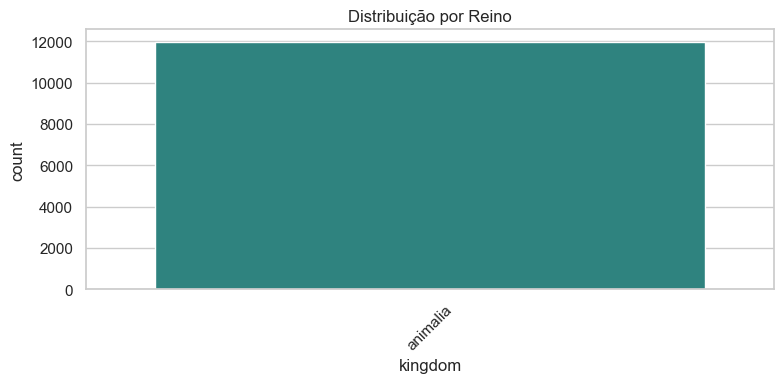

In [89]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='kingdom', order=df['kingdom'].value_counts().index, palette='viridis')
plt.title('Distribuição por Reino')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="border-left: 6px solid #ffffff; color:white; margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">🌿 Gráfico de Distribuição por Filo</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>Mostra os 10 filos mais frequentes no dataset, sendo útil para identificar grupos dominantes.</p>
</div>

C:\Users\Tiago Pedro\AppData\Local\Temp\ipykernel_22796\236568653.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_phyla.index, y=top_phyla.values, palette='plasma')


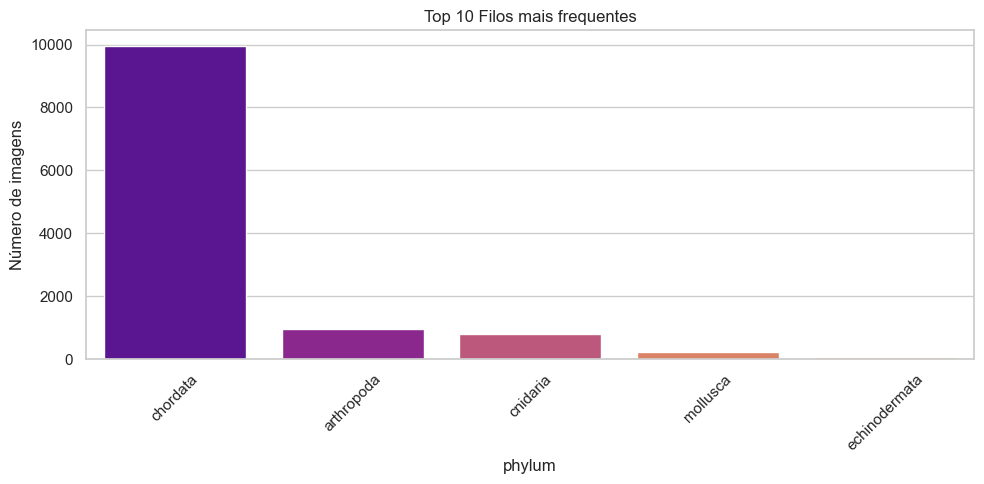

In [90]:
plt.figure(figsize=(10, 5))
top_phyla = df['phylum'].value_counts().nlargest(10)
sns.barplot(x=top_phyla.index, y=top_phyla.values, palette='plasma')
plt.title('Top 10 Filos mais frequentes')
plt.ylabel('Número de imagens')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="border-left: 6px solid #ffffff; color:white; margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">🧬 Gráfico de Distribuição por Família</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>Apresenta as 15 famílias com mais imagens. Isto ajuda a compreender o grau de desbalanceamento entre classes no problema de classificação.</p>
</div>

C:\Users\Tiago Pedro\AppData\Local\Temp\ipykernel_22796\3607442407.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_families.index, y=top_families.values, palette='magma')


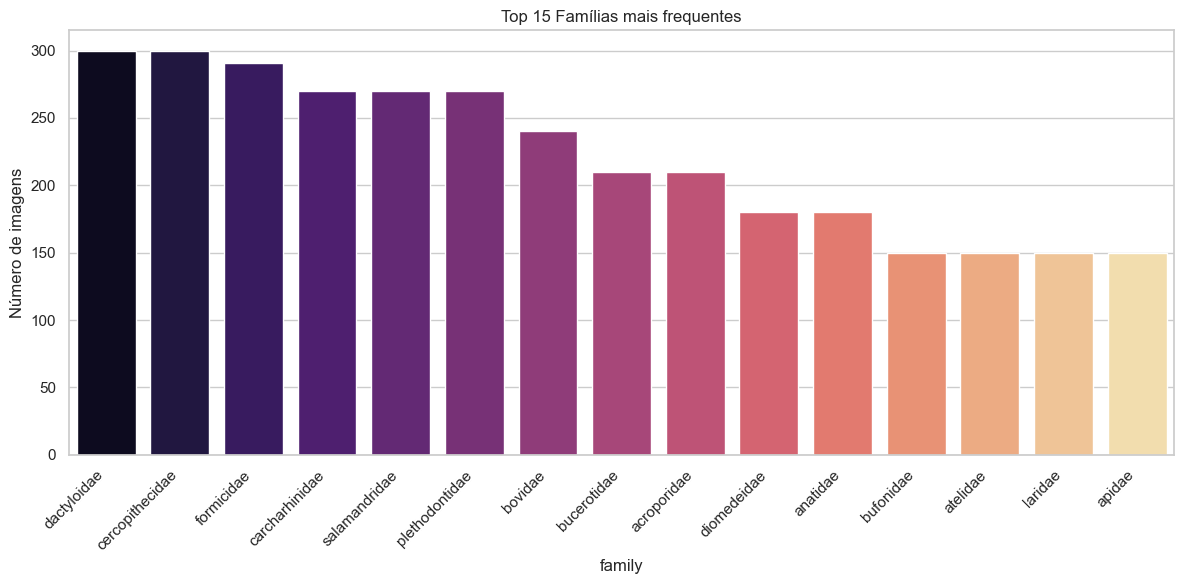

In [91]:
plt.figure(figsize=(12, 6))
top_families = df['family'].value_counts().nlargest(15)
sns.barplot(x=top_families.index, y=top_families.values, palette='magma')
plt.title('Top 15 Famílias mais frequentes')
plt.ylabel('Número de imagens')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<div style="border-left: 6px solid #27ae60; color:white; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">🔍 Verificação do Dataset</h2>
</div>

<div style="margin-left:60px; padding:10px;"> 
  <p>Antes de treinar o modelo, é importante verificar a integridade dos dados. Neste bloco são verificadas:</p>
  <ul>
    <li>🗂️ Presença de imagens em falta (valores ausentes)</li>
    <li>⚖️ Desequilíbrio na quantidade de imagens por classe (família)</li>
    <li>🖼️ Visualização de algumas imagens de exemplo</li>
  </ul>
</div>


<div style="border-left: 6px solid #ffffff; color:white; margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">📁 Verificação de Imagens em Falta</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>Verifica se todos os ficheiros listados no <code>metadata.csv</code> existem nas respetivas subpastas. É feita uma varredura nas pastas dentro de <code>data/external/</code>.</p>
</div>

In [92]:
def check_image_exists(image_file):
    for root, dirs, files in os.walk(IMAGE_DIR):
        if image_file in files:
            return True
    return False

In [93]:
missing_images = []
for index, row in df.iterrows():
    image_path = row['file_path']
    image_name = os.path.basename(image_path)
    if not check_image_exists(image_name):
        missing_images.append(image_path)

print(f"Número de imagens em falta: {len(missing_images)}")

Número de imagens em falta: 0


<div style="border-left: 6px solid #ffffff; color:white; margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">⚠️ Verificação de Desbalanceamento nas Classes</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>Mostra a distribuição do número de imagens por família. Também identifica as famílias com menos de 40 imagens — essas classes podem causar problemas durante o treino.</p>
</div>

In [94]:
family_counts = df['family'].value_counts()

print("\n📊 Número de imagens por família (labels):")
print(family_counts)


📊 Número de imagens por família (labels):
family
dactyloidae        300
cercopithecidae    300
formicidae         291
carcharhinidae     270
salamandridae      270
                  ... 
cyprinodontidae     30
alligatoridae       30
balaenidae          30
goodeidae           30
siluridae           29
Name: count, Length: 202, dtype: int64


<div style="border-left: 6px solid #27ae60; color:white; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">🖼️ Ver Exemplos de Imagens</h2>
</div>

<div style="margin-left:60px; padding:10px;"> 
  <p>Seleciona aleatoriamente 5 imagens do dataset e mostra-as com as respetivas famílias. Este passo é útil para confirmar visualmente que os caminhos estão corretos e que as imagens correspondem às labels.</p>
</div>


In [95]:
sample_df = df.sample(n=5, random_state=10)

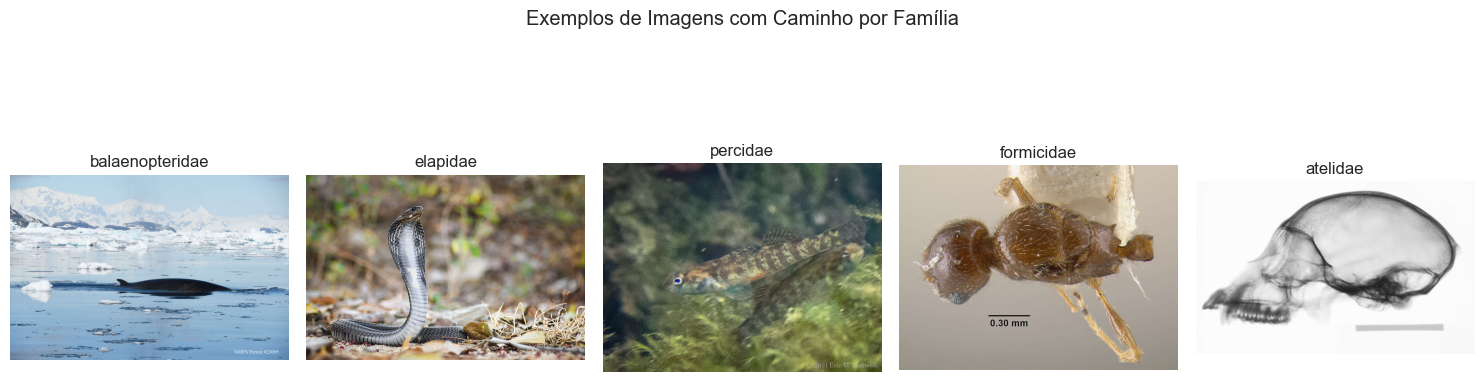

In [96]:
plt.figure(figsize=(15, 5))
for i, row in enumerate(sample_df.itertuples(), 1):
    img = Image.open(BASE_PATH / f'{row.file_path}')
    plt.subplot(1, 5, i)
    plt.imshow(img)
    plt.title(row.family)
    plt.axis('off')

plt.suptitle("Exemplos de Imagens com Caminho por Família")
plt.tight_layout()
plt.show()

<div style="border-left: 6px solid #27ae60; color:white; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">⚙️ Pré-processamento</h2>
</div>

<div style="margin-left:60px; padding:10px;"> 
  <p>Esta etapa prepara os dados para serem utilizados no modelo de deep learning. Envolve desde a leitura e organização dos ficheiros até às transformações nas imagens.</p>
</div>


<div style="border-left: 6px solid #ffffff; color:white; margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">🗂️ Padronizar caminhos das imagens</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>Usa a coluna <code>family</code> e o nome do ficheiro da imagem para gerar o caminho completo para cada imagem armazenada nas subpastas de <code>data/external/</code>.</p>
</div>

In [ ]:
df['file_path'] = df['file_path'].apply(lambda x: IMAGE_DIR / x)
for path in df['file_path'].head():
    print(path)

D:\Repositories\DL_EOLP\data\external\mollusca_unionidae\12853737_449393_eol-full-size-copy.jpg
D:\Repositories\DL_EOLP\data\external\chordata_geoemydidae\20969394_793083_eol-full-size-copy.jpg
D:\Repositories\DL_EOLP\data\external\chordata_cryptobranchidae\28895411_319982_eol-full-size-copy.jpg
D:\Repositories\DL_EOLP\data\external\chordata_turdidae\29658536_45510188_eol-full-size-copy.jpg
D:\Repositories\DL_EOLP\data\external\chordata_indriidae\21252576_7250886_eol-full-size-copy.jpg


<div style="border-left: 6px solid #ffffff; color:white; margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">🧪 Divisão em treino, validação e teste</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>O conjunto de dados é dividido para treino e validação. O conjunto de teste é mantido separado e intocado, para avaliar o desempenho final.</p>
</div>

In [141]:
train_validation_df, test_df = train_test_split(
    df,
    test_size=0.1,
    stratify=df['family'],
    random_state=42
)

print(f"Treino E Validação: {len(train_validation_df)} | Teste: {len(test_df)}")

Treino E Validação: 10784 | Teste: 1199


In [142]:
train_validation_df.to_csv(ITERIM_DIR / 'train_validation.csv', index=False)
test_df.to_csv(ITERIM_DIR / 'test.csv', index=False)

In [143]:
train_df, val_df = train_test_split(
    train_validation_df,
    test_size=0.2,
    stratify=train_validation_df['family'],
    random_state=42
)

print(f"Treino: {len(train_df)} | Validação: {len(val_df)}")

Treino: 8627 | Validação: 2157


In [144]:
train_df.to_csv(ITERIM_DIR / 'train.csv', index=False)
val_df.to_csv(ITERIM_DIR / 'validation.csv', index=False)